# Jithan's EDA Assignment

## Load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\JITHAN\\Downloads\\loan\\loan.csv")

C:\Python\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Clean the data

In [3]:
df.shape

(39717, 111)

In [4]:
df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
                              ...  
tax_liens                         1
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64

In [16]:
cols_to_delete = []
for col in df.columns:
    if df[col].nunique() < 2:
        print(col, df[col].nunique()) 
        cols_to_delete.append(col)
df2 = df.drop(cols_to_delete, axis=1)

pymnt_plan 1
initial_list_status 1
collections_12_mths_ex_med 1
mths_since_last_major_derog 0
policy_code 1
application_type 1
annual_inc_joint 0
dti_joint 0
verification_status_joint 0
acc_now_delinq 1
tot_coll_amt 0
tot_cur_bal 0
open_acc_6m 0
open_il_6m 0
open_il_12m 0
open_il_24m 0
mths_since_rcnt_il 0
total_bal_il 0
il_util 0
open_rv_12m 0
open_rv_24m 0
max_bal_bc 0
all_util 0
total_rev_hi_lim 0
inq_fi 0
total_cu_tl 0
inq_last_12m 0
acc_open_past_24mths 0
avg_cur_bal 0
bc_open_to_buy 0
bc_util 0
chargeoff_within_12_mths 1
delinq_amnt 1
mo_sin_old_il_acct 0
mo_sin_old_rev_tl_op 0
mo_sin_rcnt_rev_tl_op 0
mo_sin_rcnt_tl 0
mort_acc 0
mths_since_recent_bc 0
mths_since_recent_bc_dlq 0
mths_since_recent_inq 0
mths_since_recent_revol_delinq 0
num_accts_ever_120_pd 0
num_actv_bc_tl 0
num_actv_rev_tl 0
num_bc_sats 0
num_bc_tl 0
num_il_tl 0
num_op_rev_tl 0
num_rev_accts 0
num_rev_tl_bal_gt_0 0
num_sats 0
num_tl_120dpd_2m 0
num_tl_30dpd 0
num_tl_90g_dpd_24m 0
num_tl_op_past_12m 0
pct_tl_nvr_d

In [17]:
df2.shape

(39717, 48)

## Check missing values and impute where we can

In [18]:
df2.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec   

In [19]:
df2 = df2.drop("next_pymnt_d", axis=1)

In [20]:
df2.last_pymnt_d.value_counts()

May-16    1256
Mar-13    1026
Dec-14     945
May-13     907
Feb-13     869
          ... 
Jun-08      10
Nov-08      10
Mar-08       5
Jan-08       4
Feb-08       1
Name: last_pymnt_d, Length: 101, dtype: int64

In [21]:
# impute missing values as UNPAID
df2.last_pymnt_d.fillna('UNPAID', inplace=True)

In [22]:
# lets drop desc field as it is a bloat data which is not meaningful for statistical analysis
df2 = df2.drop("desc", axis=1)

In [23]:
# lets drop emp_title as it is not significant for our study
df2 = df2.drop("emp_title", axis=1)

In [24]:
df2.shape

(39717, 45)

In [25]:
df2.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util

In [26]:
df2.mths_since_last_delinq.value_counts()

0.0      443
15.0     252
30.0     247
23.0     247
24.0     241
        ... 
89.0       1
107.0      1
85.0       1
97.0       1
95.0       1
Name: mths_since_last_delinq, Length: 95, dtype: int64

In [27]:
# For filling nulls in mths_since_last_delinq, lets use mode or 0.0 the more repeated value
df2.mths_since_last_delinq.fillna(df2.mths_since_last_delinq.mode()[0], inplace=True)

In [28]:
# lets do same with mths_since_last_record
df2.mths_since_last_record.value_counts()

0.0      670
104.0     61
89.0      60
113.0     59
111.0     57
        ... 
19.0       1
20.0       1
120.0      1
129.0      1
5.0        1
Name: mths_since_last_record, Length: 111, dtype: int64

In [29]:
df2.mths_since_last_record.fillna(df2.mths_since_last_record.mode()[0], inplace=True)

In [30]:
df2.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
url                           0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq        0
mths_since_last_record        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_ac

In [31]:
df2[df2.revol_util.isnull()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
3565,1016416,1244120,8000,8000,8000.000000,36 months,19.42%,294.95,E,E3,...,10706.01,8000.00,2691.01,15.000000,0.00,0.0000,Dec-14,76.83,Dec-15,0.0
4714,997734,1222858,6100,6100,6100.000000,36 months,14.27%,209.29,C,C2,...,1755.22,989.91,471.90,0.000000,293.41,2.8200,Jun-12,209.29,Nov-12,0.0
4943,790093,994164,7200,7200,7200.000000,36 months,14.27%,247.03,C,C2,...,7306.07,7200.00,106.07,0.000000,0.00,0.0000,Apr-12,66.27,Mar-14,0.0
11282,817195,1024992,5000,5000,5000.000000,36 months,21.36%,189.31,F,F4,...,6814.70,5000.00,1814.70,0.000000,0.00,0.0000,Aug-14,204.01,Feb-15,0.0
12042,804073,1009899,3000,3000,3000.000000,60 months,22.11%,83.05,G,G1,...,498.49,113.96,217.52,0.000000,167.01,30.0618,Nov-11,83.05,Apr-12,0.0
12147,802201,1007832,4275,4275,4275.000000,36 months,15.99%,150.28,D,D2,...,5356.19,4275.00,1081.19,0.000000,0.00,0.0000,Dec-13,1166.73,Jan-14,0.0
13891,772732,974723,2000,2000,1900.000000,36 months,18.39%,72.70,E,E2,...,89.79,0.00,0.00,0.000000,89.79,0.8500,UNPAID,0.00,Nov-11,0.0
17985,706991,899283,20000,20000,4575.003440,60 months,20.48%,535.24,G,G2,...,1452.03,2091.72,3252.38,0.000000,1030.96,185.5728,Feb-12,535.24,Jul-12,0.0
18184,702880,894759,1825,1825,1825.000000,36 months,12.68%,61.22,C,C1,...,1930.96,1825.00,105.96,0.000000,0.00,0.0000,May-12,223.80,May-12,0.0
21604,641703,821414,2500,2500,2500.000000,36 months,16.69%,88.75,E,E3,...,3197.34,2500.00,697.34,0.000000,0.00,0.0000,Jan-14,99.82,Feb-14,0.0


In [32]:
df2.revol_util.value_counts()

0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: revol_util, Length: 1089, dtype: int64

In [33]:
# revol_util is too varied and there are only 50 missing entries, we will remove the rows with missing revol_util as it could be an important parameter
df3 = df2[~df2.revol_util.isnull()]

In [34]:
df3.shape

(39667, 45)

In [35]:
df3.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1072
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
url                           0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq        0
mths_since_last_record        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_ac

In [36]:
df3.title.value_counts()

Debt Consolidation                2182
Debt Consolidation Loan           1728
Personal Loan                      659
Consolidation                      516
debt consolidation                 505
                                  ... 
Debt Consolidation/Reduction         1
moving/furniture                     1
Time to Spruce up for SPRING!!       1
2008 Ducati Hypermotard              1
JAL Loan                             1
Name: title, Length: 19583, dtype: int64

In [37]:
# title is varied, though may not be useful, we can keep it
# for missing values, we will fill with UNKNOWN
df3.title.fillna('UNKNOWN', inplace=True)

C:\Python\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [38]:
df3.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1072
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq        0
mths_since_last_record        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_ac

In [39]:
df3.pub_rec_bankruptcies.mode()

0    0.0
dtype: float64

In [40]:
df3.pub_rec_bankruptcies.fillna(df3.pub_rec_bankruptcies.mode()[0], inplace=True)

In [41]:
df3.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1072
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq        0
mths_since_last_record        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_ac

In [42]:
df3.last_credit_pull_d.fillna(df3.last_credit_pull_d.mode()[0], inplace=True)

In [43]:
df3.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1072
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq        0
mths_since_last_record        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_ac

In [44]:
df3.emp_length.describe()

count         38595
unique           11
top       10+ years
freq           8878
Name: emp_length, dtype: object

In [45]:
df3.emp_length.value_counts()

10+ years    8878
< 1 year     4571
2 years      4383
3 years      4091
4 years      3429
5 years      3278
1 year       3234
6 years      2226
7 years      1770
8 years      1477
9 years      1258
Name: emp_length, dtype: int64

In [46]:
# lets convert the emp_length into int
df3.emp_length.astype(str).apply(lambda x: x.replace("< 1","0").replace("10+","10").replace("s","").replace(" year","")).value_counts()

10     8878
0      4571
2      4383
3      4091
4      3429
5      3278
1      3234
6      2226
7      1770
8      1477
9      1258
nan    1072
Name: emp_length, dtype: int64

In [47]:
df3.emp_length.value_counts()

10+ years    8878
< 1 year     4571
2 years      4383
3 years      4091
4 years      3429
5 years      3278
1 year       3234
6 years      2226
7 years      1770
8 years      1477
9 years      1258
Name: emp_length, dtype: int64

In [58]:
df4 = df3

In [59]:
df4["emp_length"] = df4.emp_length.astype(str).apply(lambda x: x.replace("< 1","0").replace("10+","10").replace("s","").replace(" year",""))

C:\Users\JITHAN\AppData\Local\Temp/ipykernel_30132/3168225854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["emp_length"] = df4.emp_length.astype(str).apply(lambda x: x.replace("< 1","0").replace("10+","10").replace("s","").replace(" year",""))


In [60]:
df4.shape

(39667, 45)

In [61]:
# for null values in emp_length, we will remove those rows as this is a key field to impute values
df5 = df4[~df4.emp_length.isnull()]

In [62]:
df5.shape

(39667, 45)

In [63]:
df5.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
url                        0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
mths_since_last_delinq     0
mths_since_last_record     0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt   

## Cleaning data is done
## We have imputed missing values by using a new value or recurring value like mode
## For key fields, we have removed rows with missing values

In [64]:
df_final = df5

## Univariate Analysis

In [68]:
# we will derive issue month in integer
months_dict = {"Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6, "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12}
df_final["issue_month_int"] = df_final.issue_d.apply(lambda x: months_dict[x[0:3]]).astype(int)
df_final["issue_month_int"].value_counts()

12    4429
11    4163
10    3928
9     3647
8     3514
7     3470
6     3271
5     2999
4     2832
3     2684
1     2374
2     2356
Name: issue_month_int, dtype: int64

<AxesSubplot:xlabel='issue_month_int', ylabel='Count'>

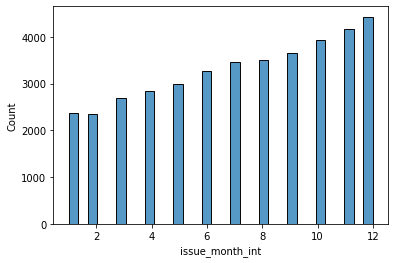

In [69]:
sns.histplot(df_final.sort_values(["issue_month_int"]).issue_month_int)

## This plot of Count versus issue month in integer shows most of the loans being taken closer to the end of the year

<AxesSubplot:xlabel='sub_grade', ylabel='Count'>

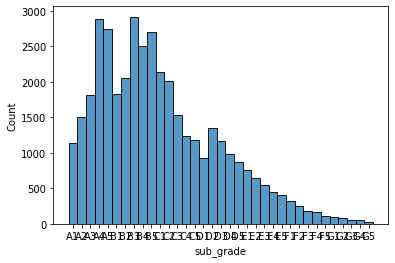

In [70]:
sns.histplot(df_final.sort_values(["sub_grade"]).sub_grade)

<AxesSubplot:xlabel='Count', ylabel='sub_grade'>

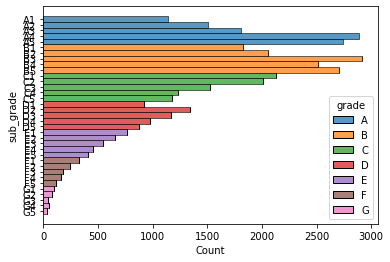

In [71]:
sns.histplot(df_final.sort_values(["sub_grade"]), y="sub_grade", hue="grade", multiple="stack")

<AxesSubplot:xlabel='Count', ylabel='emp_length'>

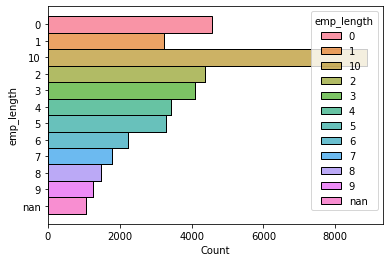

In [74]:
sns.histplot(df_final.sort_values(["emp_length"]), y="emp_length", hue="emp_length", multiple="stack")

## This plot shows that more loans are being taken by employees with tenure of 10+ years

C:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amnt'>

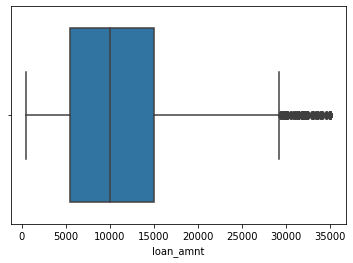

In [73]:
sns.boxplot(df_final["loan_amnt"])

## The above box plot shows that 5000 to 15000 is the usual loan amount being taken

<AxesSubplot:xlabel='Count', ylabel='grade'>

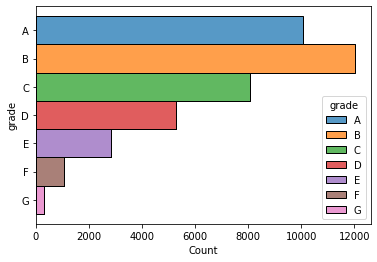

In [75]:
sns.histplot(df_final.sort_values(["grade"]), y="grade", hue="grade", multiple="stack")

## This Plot of grade versus count shows most of the loans being taken by grade B members followed by grade A members

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

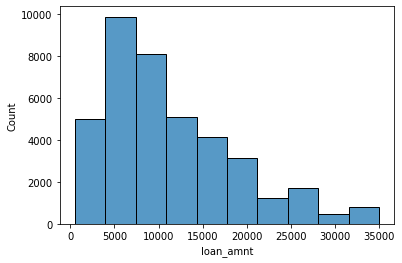

In [76]:
sns.histplot(df_final["loan_amnt"], bins=10)

## Segmented Univariate analysis
## For this we will break into 2 segments based on loan status 
## 1) Charged Off members 2) Fully Paid members

In [78]:
df_charged_off = df_final[df_final["loan_status"] == "Charged Off"]
df_fully_paid = df_final[df_final["loan_status"] == "Fully Paid"]

<AxesSubplot:xlabel='dti', ylabel='Count'>

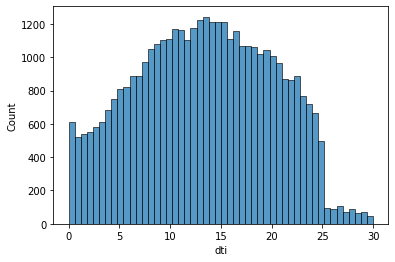

In [79]:
sns.histplot(df_final["dti"])

In [81]:
# int_rate field is not converted, so lets convert that
df_final["int_rate"] = df_final.int_rate.apply(lambda x: x.replace("%","")).astype(float)

In [84]:
df_final["int_rate"].describe

<bound method NDFrame.describe of 0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39667, dtype: float64>

In [85]:
# Rerun after fixing int_rate field
df_charged_off = df_final[df_final["loan_status"] == "Charged Off"]
df_fully_paid = df_final[df_final["loan_status"] == "Fully Paid"]

[Text(0.5, 1.0, 'grade plot of charged off members')]

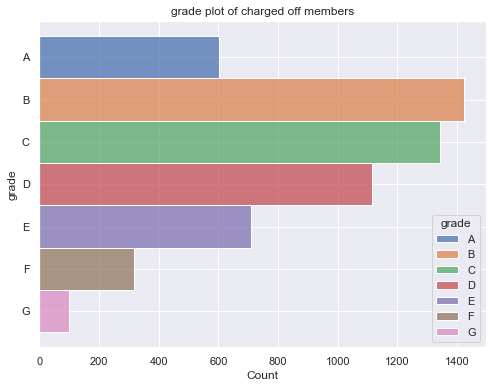

In [88]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.histplot(df_charged_off.sort_values(["grade"]), y="grade", hue="grade", multiple="stack").set(title="grade plot of charged off members")

[Text(0.5, 1.0, 'grade plot of fully paid members')]

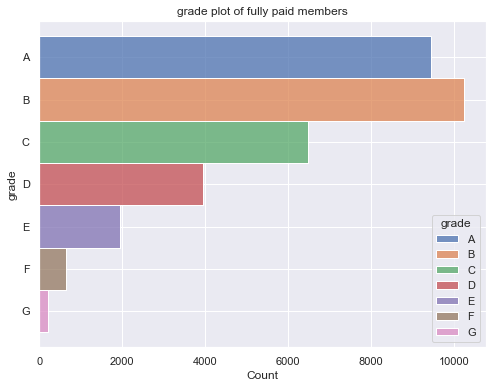

In [89]:
#sns.histplot(df_fully_paid["grade"])
sns.histplot(df_fully_paid.sort_values(["grade"]), y="grade", hue="grade", multiple="stack").set(title="grade plot of fully paid members")

## Plotting grade after segmentation on loan status shows that
## 1) Grade A members are better paying members
## 2) Grade C and D show comparatively risky behavior 


<AxesSubplot:xlabel='Count', ylabel='issue_month_int'>

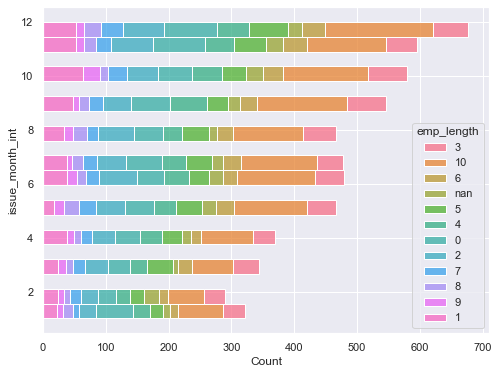

In [92]:
sns.histplot(df_charged_off.sort_values(["issue_month_int"]), y="issue_month_int", hue="emp_length", multiple="stack")

<AxesSubplot:xlabel='Count', ylabel='issue_month_int'>

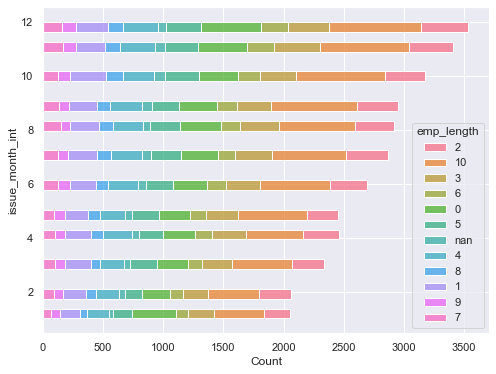

In [93]:
sns.histplot(df_fully_paid.sort_values(["issue_month_int"]), y="issue_month_int", hue="emp_length", multiple="stack")

## Bivariate Analysis

<AxesSubplot:xlabel='grade', ylabel='int_rate'>

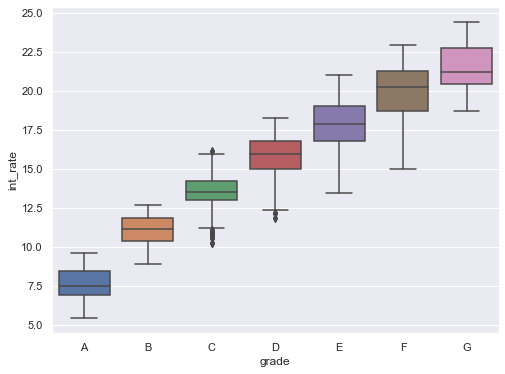

In [95]:
sns.boxplot(x="grade", y="int_rate", data=df_charged_off.sort_values(["grade"]))

<AxesSubplot:xlabel='grade', ylabel='loan_amnt'>

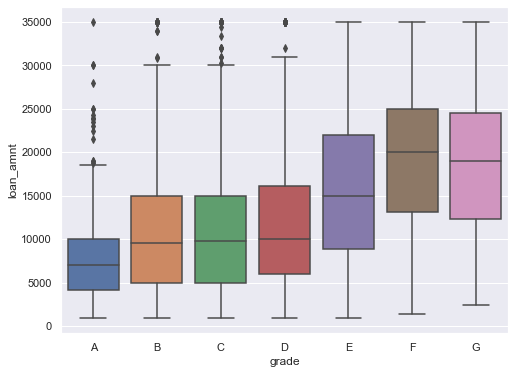

In [96]:
sns.boxplot(x="grade", y="loan_amnt", data=df_charged_off.sort_values(["grade"]))

<AxesSubplot:xlabel='grade', ylabel='loan_amnt'>

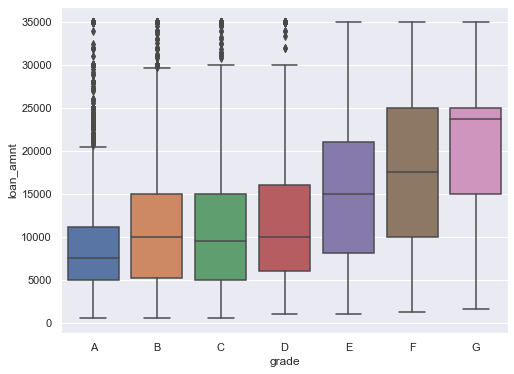

In [97]:
sns.boxplot(x="grade", y="loan_amnt", data=df_fully_paid.sort_values(["grade"]))

## From above plots, we can observe loans, revolving credit, interest increasing as the grade is increasing

[Text(0.5, 1.0, 'issue month versus grade plot of charged off members')]

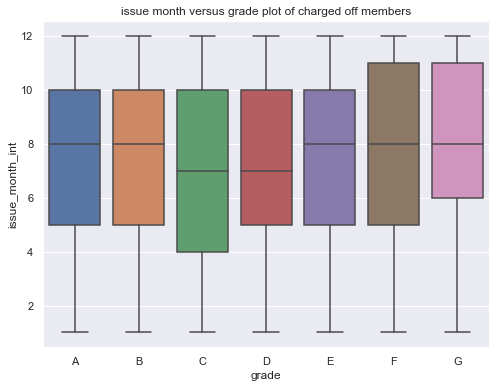

In [98]:
sns.boxplot(x="grade", y="issue_month_int", data=df_charged_off.sort_values(["grade"])).set(title="issue month versus grade plot of charged off members")

[Text(0.5, 1.0, 'issue month versus grade plot of fully paid members')]

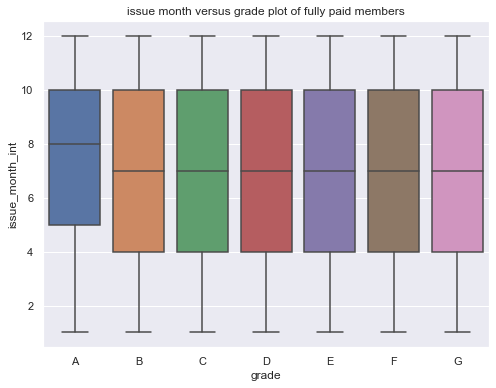

In [99]:
sns.boxplot(x="grade", y="issue_month_int", data=df_fully_paid.sort_values(["grade"])).set(title="issue month versus grade plot of fully paid members")

<AxesSubplot:>

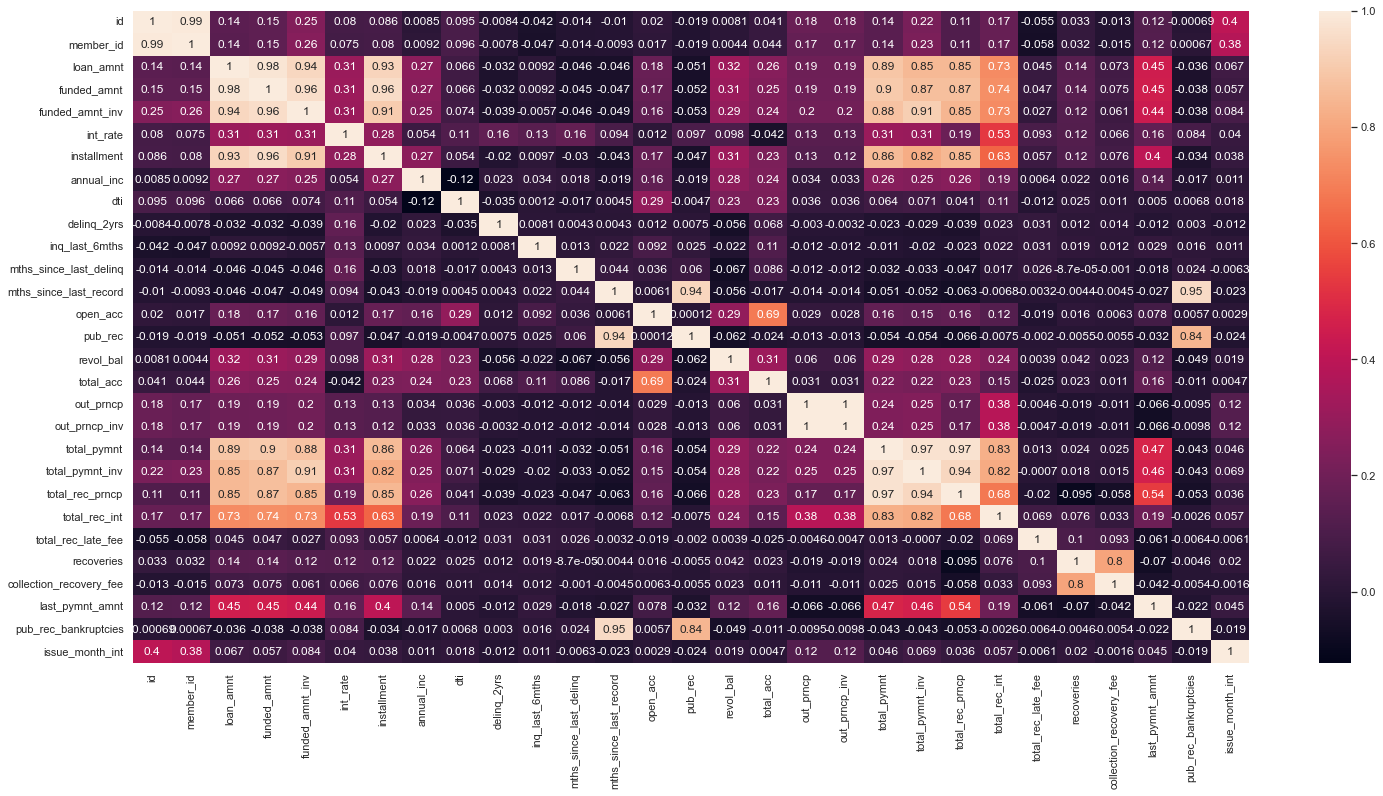

In [100]:
corr = df_final.corr()
sns.set(rc = {'figure.figsize':(25,12)})
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## This is an abreviated jupyter notebook based on the analysis made with lot of trials and errors
## Full notebook can be found under artifacts folder